<a href="https://colab.research.google.com/github/Ognjen78/ADM/blob/main/ADM_Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas nltk text2emotion


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def get_reviews(movie_id, num_reviews):
    reviews = []
    base_url = f"https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2"

    for start in range(0, num_reviews, 10):
        url = f"{base_url}?start={start}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        review_divs = soup.find_all('div', class_='text show-more__control')
        for review in review_divs:
            reviews.append(review.text)

        if len(review_divs) < 10:
            break

    return reviews

def analyze_sentiment(reviews):
    sia = SentimentIntensityAnalyzer()
    reviews['sentiment'] = reviews['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
    return reviews

def analyze_emotions(reviews):
    reviews['emotions'] = reviews['review'].apply(lambda x: te.get_emotion(x))
    return reviews

def prepare_data_for_gephi(data):
    edges = []
    for index, row in data.iterrows():
        user = f"user_{index}"
        sentiments = row['sentiment']
        for emotion, score in row['emotions'].items():
            edges.append([user, emotion, score])

    edges_df = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])
    edges_df.to_csv("gephi_edges.csv", index=False)

# Main Execution
movie_id = "tt0111161"  # The Shawshank Redemption
num_reviews = 100
reviews = get_reviews(movie_id, num_reviews)

df = pd.DataFrame(reviews, columns=['review'])
df = analyze_sentiment(df)
df = analyze_emotions(df)
df.to_csv("imdb_reviews_with_analysis.csv", index=False, encoding='utf-8')

prepare_data_for_gephi(df)

In [ ]:
!pip install seaborn


In [36]:
data = pd.read_csv('imdb_reviews_with_analysis.csv')
data

,review,sentiment,emotions
0,The Shawshank Redemption is written and direct...,0.9985,"{'Happy': 0.12, 'Angry': 0.06, 'Surprise': 0.1..."
1,It is no wonder that the film has such a high ...,0.9804,"{'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.36..."
2,I'm trying to save you money; this is the last...,0.9927,"{'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.2..."
3,"In its Oscar year, Shawshank Redemption (writt...",0.9991,"{'Happy': 0.19, 'Angry': 0.14, 'Surprise': 0.1..."
4,This movie is not your ordinary Hollywood flic...,0.9758,"{'Happy': 0.26, 'Angry': 0.13, 'Surprise': 0.1..."
...,...,...,...
245,Well I guess I'm a little late to the party as...,0.9839,"{'Happy': 0.16, 'Angry': 0.05, 'Surprise': 0.1..."
246,There's a reason this is rated the #1 . It is ...,0.8402,"{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.14..."
247,I still can't quite get the enormous reputatio...,0.9840,"{'Happy': 0.38, 'Angry': 0.0, 'Surprise': 0.12..."
248,After seeing this movie I could not notice to ...,0.9756,"{'Happy': 0.4, 'Angry': 0.0, 'Surprise': 0.2, ..."


In [35]:
print(imdb_reviews_with_analysis.head())


                                              review  sentiment  \
0  The Shawshank Redemption is written and direct...     0.9985   
1  It is no wonder that the film has such a high ...     0.9804   
2  I'm trying to save you money; this is the last...     0.9927   
3  In its Oscar year, Shawshank Redemption (writt...     0.9991   
4  This movie is not your ordinary Hollywood flic...     0.9758   

                                            emotions  Happy  Angry  Surprise  \
0  {'Happy': 0.12, 'Angry': 0.06, 'Surprise': 0.1...   0.12   0.06      0.12   
1  {'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.36...   0.14   0.00      0.36   
2  {'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.2...   0.09   0.08      0.21   
3  {'Happy': 0.19, 'Angry': 0.14, 'Surprise': 0.1...   0.19   0.14      0.12   
4  {'Happy': 0.26, 'Angry': 0.13, 'Surprise': 0.1...   0.26   0.13      0.11   

    Sad  Fear  
0  0.28  0.42  
1  0.29  0.21  
2  0.20  0.42  
3  0.23  0.31  
4  0.13  0.37  


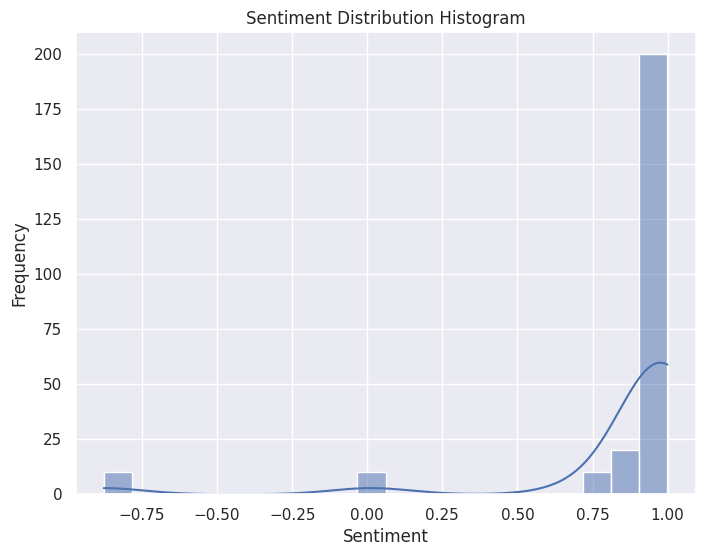

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Učitajte podatke iz CSV datoteke u DataFrame
imdb_reviews_with_analysis = pd.read_csv("imdb_reviews_with_analysis.csv")

# Postavite veličinu grafikona
plt.figure(figsize=(8, 6))

# Kreirajte histogram distribucije sentimenta
sns.histplot(data=imdb_reviews_with_analysis, x='sentiment', bins=20, kde=True)
plt.title("Sentiment Distribution Histogram")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()








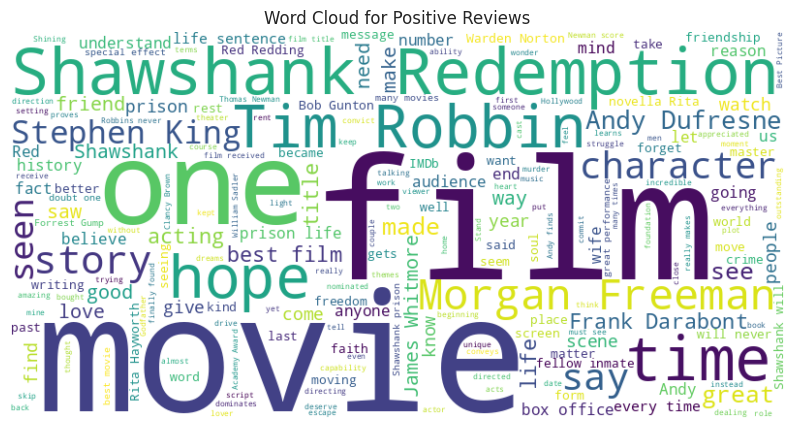

In [ ]:
from wordcloud import WordCloud

# Kreirajte word cloud za pozitivne recenzije
positive_reviews = imdb_reviews_with_analysis[imdb_reviews_with_analysis['sentiment'] > 0]
positive_text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Prikazite word cloud grafikon
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


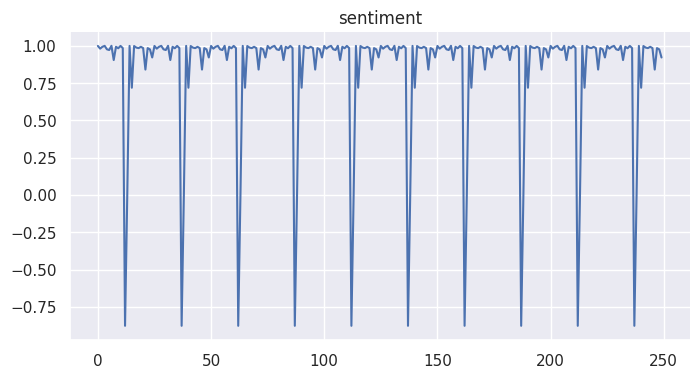

In [37]:
# @title sentiment

from matplotlib import pyplot as plt
data['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
from transformers import pipeline




In [46]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [50]:
def split_reviews(text, max_length=512):
    return [text[i:i+max_length] for i in range(0, len(text), max_length)]

df['review'] = df['review'].apply(split_reviews)
df['emotion_labels'] = df['review'].apply(lambda segments: [emotion(segment)[0]['label'] for segment in segments])



In [51]:
df['emotion_labels'] = df['review'].apply(lambda segments: [get_emotion_label(segment) for segment in segments])


In [52]:
emotion_counts = df['emotion_labels'].explode().value_counts()
print(emotion_counts)


emotion_labels
admiration        560
neutral           130
approval           70
joy                30
realization        30
disappointment     20
disapproval        20
love               20
optimism           10
surprise           10
nervousness        10
annoyance          10
curiosity          10
gratitude          10
confusion          10
Name: count, dtype: int64


In [53]:
average_emotion_count = df['emotion_labels'].apply(len).mean()
print("Average number of emotional labels per review:", average_emotion_count)


Average number of emotional labels per review: 3.8


In [55]:
expanded_df = df.explode('emotion_labels')



In [56]:
average_review_length_by_emotion = expanded_df.groupby('emotion_labels')['review'].apply(lambda x: x.apply(len).mean())
print(average_review_length_by_emotion)

emotion_labels
admiration         5.178571
annoyance         10.000000
approval           6.285714
confusion          6.000000
curiosity         12.000000
disappointment     9.000000
disapproval        7.500000
gratitude          2.000000
joy                5.333333
love               6.000000
nervousness       10.000000
neutral            6.923077
optimism           6.000000
realization        8.000000
surprise           6.000000
Name: review, dtype: float64


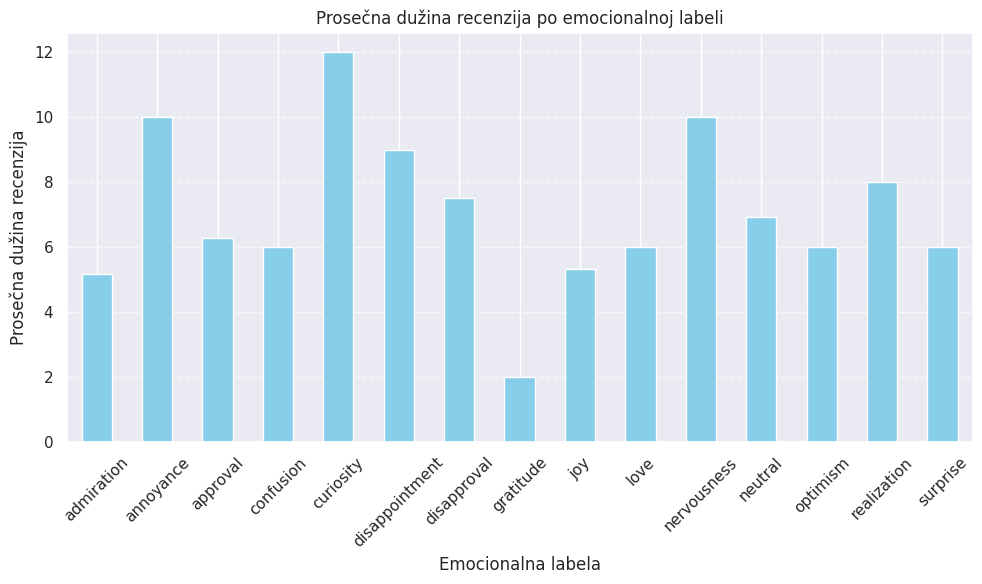

In [57]:
import matplotlib.pyplot as plt

# Grupišemo podatke po emocionalnim labelama i izračunavamo prosečnu dužinu recenzija
average_review_length_by_emotion = expanded_df.groupby('emotion_labels')['review'].apply(lambda x: x.apply(len).mean())

# Kreiramo graf
plt.figure(figsize=(10, 6))
average_review_length_by_emotion.plot(kind='bar', color='skyblue')
plt.title('Prosečna dužina recenzija po emocionalnoj labeli')
plt.xlabel('Emocionalna labela')
plt.ylabel('Prosečna dužina recenzija')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
